# 1. Problem Statement

We need to model a NN that can classify whether a given image is Building, Forest or Glacier.

We are using dataset imorted from Kaggle titled (Intel Image Classification - 6 class dataset).
<br>I've only used 3 class dataset here for reducing the compute duration.

# 2. Importing libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from random import randint
import cv2 as cv
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.keras import *

# 3. Getting Dataset

### Example of using os library

In [2]:
os.listdir('seg_train')

['buildings', 'forest', 'glacier']

In [3]:
d = 'seg_train'
l = 'buildings'
os.listdir(d+r'/'+l)[:10]   # string literal -> not a escape char.

['0.jpg',
 '10006.jpg',
 '1001.jpg',
 '10014.jpg',
 '10018.jpg',
 '10029.jpg',
 '10032.jpg',
 '10056.jpg',
 '1009.jpg',
 '10113.jpg']

### Function to get the dataset from computer and shuffling

In [4]:
def get_images(directory):
    Images = []
    Labels = []
    
    label = 0
    
    for labels in os.listdir(directory):
        if labels == 'glacier':
            label = 2
        if labels == 'sea':
            label = 4
        if labels == 'buildings':
            label = 0
        if labels == 'forest':
            label = 1
        if labels == 'street':
            label = 5
        if labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+r'/'+labels):
            image = cv.imread(directory+r'/'+labels+r'/'+image_file)
            image = cv.resize(image, (150, 150))
            
            Images.append(image)
            Labels.append(label)
    return shuffle(Images,Labels, random_state = 128)

In [5]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest',
             5:'street', 3:'mountain'}
    return labels[class_code]

### Checking the shuffle function using an example

In [6]:
mylist = [10, 11, 12, 13]
a = [0,1,2,3]
shuffle(mylist, a)

[[13, 11, 12, 10], [3, 1, 2, 0]]

In [7]:
Images, Labels = get_images('seg_train')

# 4. Visualizing the dataset

In [8]:
type(Images)

list

**The Image and Labels have datatype as list.**

as shown below:

In [9]:
print(np.array(Images).shape)
print(np.array(Labels).shape)

(6866, 150, 150, 3)
(6866,)


In [10]:
Images = np.array(Images)
Labels = np.array(Labels)

### Visualizing some examples of training set

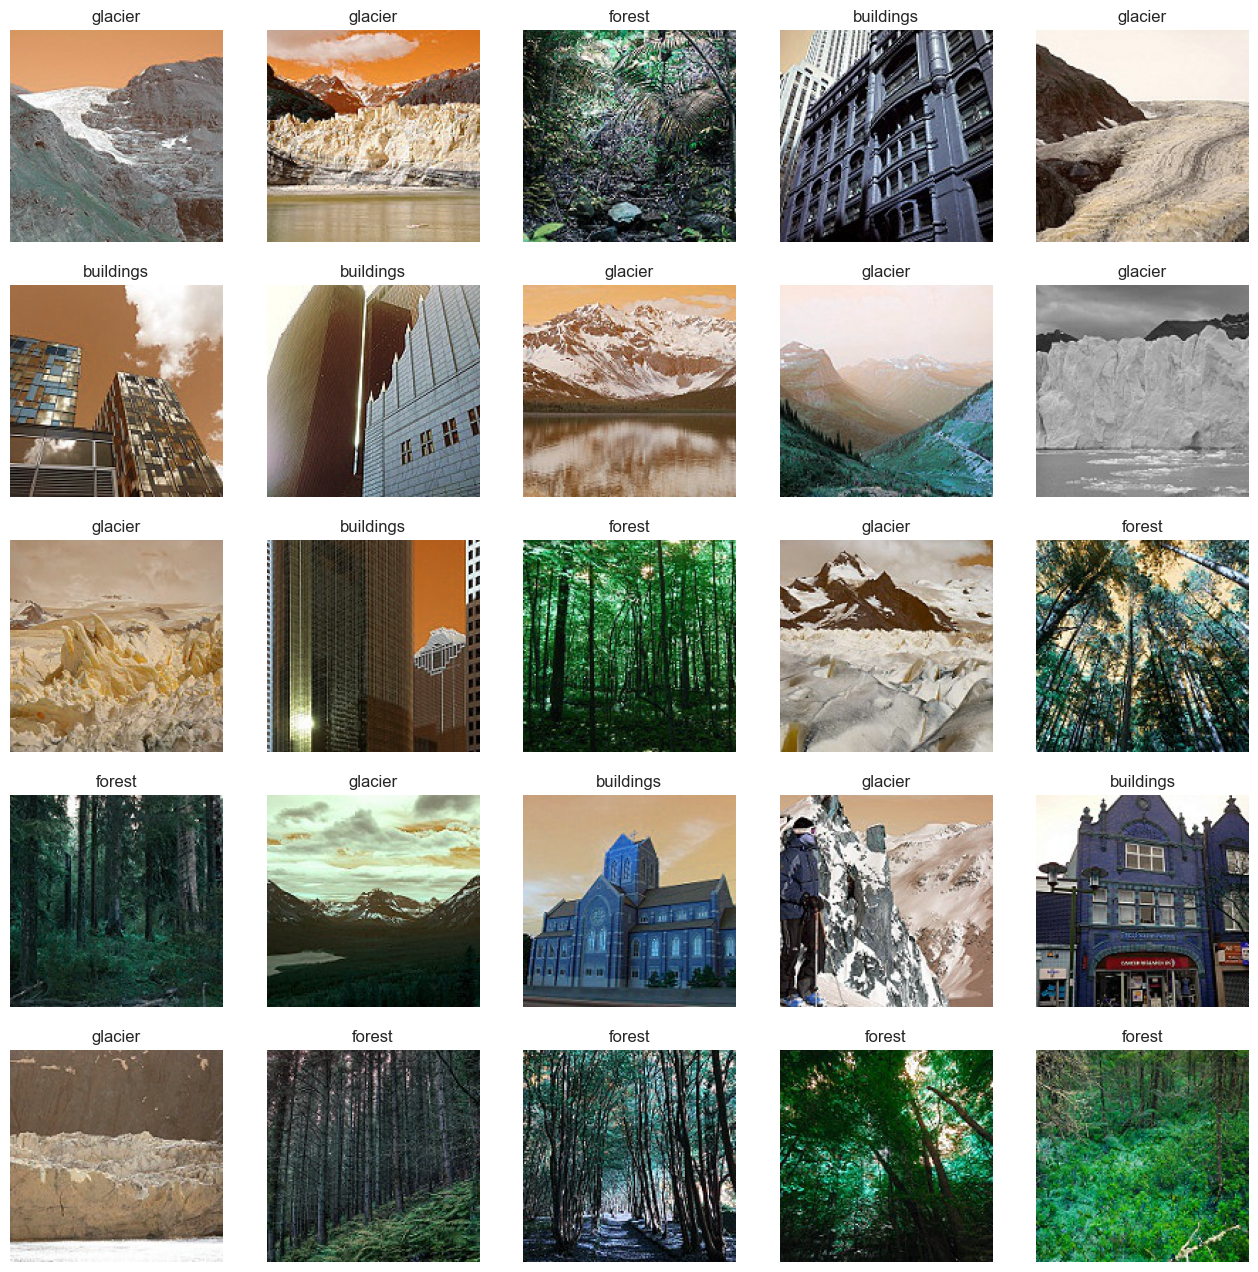

In [11]:
fig , ax = plt.subplots(5, 5, figsize = (16,16))
for i in range(5):
    for j in range(5):
        rnd_number = randint(0, len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i, j].axis('off')

# 5. Modeling

In [12]:
lam = 0.03
model = tf.keras.Sequential()

model.add(layers.Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(16,kernel_size=(3,3), activation = 'relu', 
                       kernel_regularizer=tf.keras.regularizers.L2(lam)))
model.add(layers.MaxPool2D())

model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lam)))
model.add(layers.Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2073700   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Images,Labels,
          epochs=100,
          validation_split=0.2,
          callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
          verbose = 1)

Epoch 1/100
172/172 [==============================] - 24s 142ms/step - loss: 24.4844 - accuracy: 0.7354 - val_loss: 5.1314 - val_accuracy: 0.8275
Epoch 2/100
172/172 [==============================] - 27s 158ms/step - loss: 3.9985 - accuracy: 0.9026 - val_loss: 3.5575 - val_accuracy: 0.8683
Epoch 3/100
172/172 [==============================] - 24s 138ms/step - loss: 2.7520 - accuracy: 0.9630 - val_loss: 2.7627 - val_accuracy: 0.8741
Epoch 4/100
172/172 [==============================] - 24s 137ms/step - loss: 2.0790 - accuracy: 0.9780 - val_loss: 2.3090 - val_accuracy: 0.8690
Epoch 5/100
172/172 [==============================] - 23s 136ms/step - loss: 1.6183 - accuracy: 0.9911 - val_loss: 1.8853 - val_accuracy: 0.8828
Epoch 6/100
172/172 [==============================] - 23s 136ms/step - loss: 1.3681 - accuracy: 0.9780 - val_loss: 1.8938 - val_accuracy: 0.8595
Epoch 7/100
172/172 [==============================] - 24s 137ms/step - loss: 1.3658 - accuracy: 0.9470 - val_loss: 2.0152 

**Check for Overfitting**

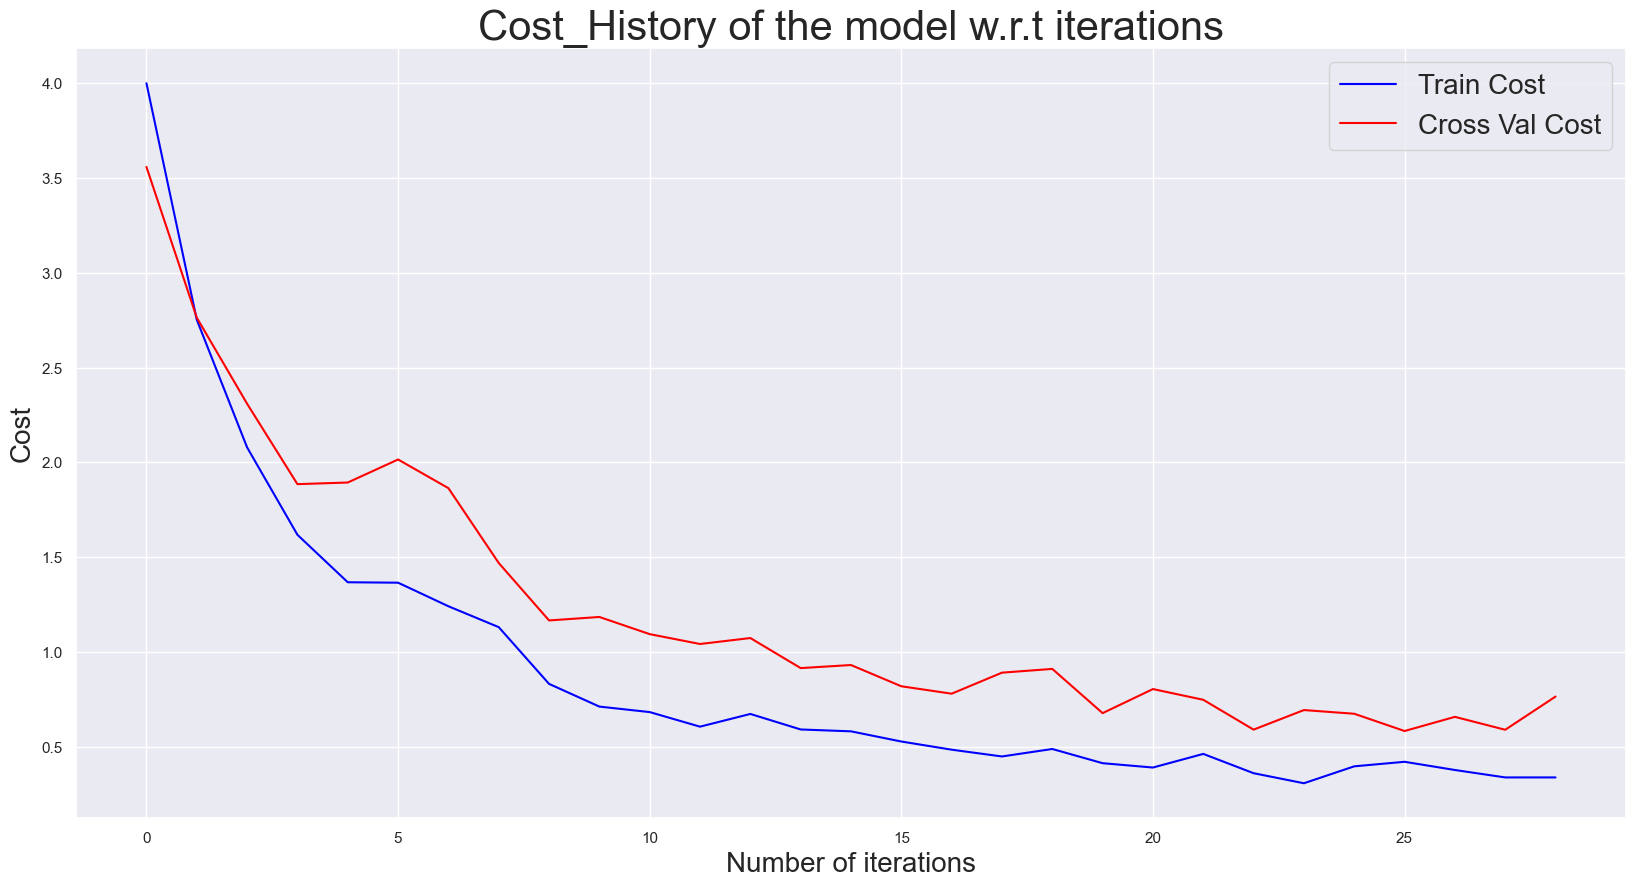

In [14]:
fig, ax = plt.subplots(figsize = (20,10))
ax = plt.plot(model.history.history['loss'][1:], color = 'Blue')
ax = plt.plot(model.history.history['val_loss'][1:], color = 'red')
plt.title('Cost_History of the model w.r.t iterations', fontsize = 30)
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Cost', fontsize = 20)
plt.legend(['Train Cost', 'Cross Val Cost'], fontsize = 20)
plt.show()

# 6. Accuracy 

**(using Test dataset)**

In [15]:
test_images,test_labels = get_images('seg_test')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

46/46 [==============================] - 2s 39ms/step - loss: 0.7523 - accuracy: 0.8600 1s


[0.7523270845413208, 0.8599726557731628]